# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Nicolas Barral](http://www.imperial.ac.uk/people/n.barral)

# Lecture 2: Numerical Differentiation. Extra exercises

## Learning objectives:

* Learn about finite difference approximations to derivatives.
* Be able to implement forward and central difference methods.
* Calculate higher-order derivatives.
* Solve simple ODEs using the finite difference method.

## <span style="color:blue">Exercise: Write Taylor expansions</span>

Write the Taylor series expansion of the following functions to the order 5:
 - $f(x) = e^x$ in $x_0 = 0$
 - $f(x) = \frac{1}{1-x}$ in $x_0 = 0$
 - $f(x) = sin(x)$ in $x_0 = \pi$

Let's recall the lecture: 
\begin{align*}
f(x_0+h)&=f(x_0)+hf'(x_0)+ \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\ & =f(x_0)+hf'(x_0)+O(h^2)
\end{align*}

thus, noting $h=x-x_0$ we have:  

for $f(x) = e^x$ in $x_0 = 0$  
$f'(x) = \exp(x)$ and $f'(0) = 1$
$$
\exp(x) = \exp(0) + x \exp(0) + x^2/2! \exp(0) + x^3/3! \exp(0) + x^4/4! \exp(0) + x^5/5! \exp(0) + O(x^6) \\
       = 1 + x + x^2/2 + x^3/6 + x^4/24 + x^5/120 + O(x^6)
$$

for $f(x) = \frac{1}{1-x}$ in $x_0 = 0$  
$f'(x) = -1/(1-x)^2$ and $f'(0) = -1$ 
$$
f(x) = -1 - x - x^2/2 - x^3/6 - x^4/24 - x^5/120 + O(x^6)
$$

for $f(x) = \sin(x)$ in $x_0 = \pi$  
$f'(x) = \cos(x)$ and $f'(\pi) = -1$  
$$
\sin(x) = -1 - (x-\pi) (x-\pi)^2/2 - (x-\pi)^3/6 - (x-\pi)^4/24 - (x-\pi)^5/120 - O((x-\pi)^6)
$$

## <span style="color:blue">Exercise: Write a finite difference scheme of $f'''$</span>

The third derivative of function f is noted $f'''(x) = f^{(3)}(x) = \frac{\mathrm{d}^3 f}{\mathrm{d}x^3}$.
Notice that $f'''(x) = g'(x)$ where $g(x)=f''(x)$. Use this remark to write a finite difference approximation of $f'''$ in $x_0$. Use central differencing for both first and second derivative approximations.

$$g'(x_0) \approx \frac{g(x_0+h)-g(x_0-h)}{2h}$$
hence
$$f'''(x_0) \approx \frac{f''(x_0+h)-f''(x_0-h)}{2h}$$
$$ f'''(x_0) \approx \frac{\frac{f(x_0+2h)-2f(x_0+h)+f(x_0)}{h^2} - \frac{f(x_0)-2f(x_0-h)+f(x_0-2h)}{h^2}}{2h} $$
and finally
$$ f'''(x_0) \approx \frac{\frac{1}{2}f(x_0+2h) - f(x_0+h) + f(x_0-h) + \frac{1}{2}f(x_0-2h)}{h^3} $$

Note that we could have used $h/2$ instead of $h$ in our finite difference schemes, but we generally do not want terms with $h/2$ (or any fraction of h) in the final result.

## <span style="color:blue">Exercise: Accuracy of forward Euler and Heun's methods</span>

Consider equation 
$$u'(t)=u(t),\quad u(0)=1\,.$$

Use the functions from Exercises 2.5 and 2.6 to plot the forward Euler and Heun's approximate solutions of this equation for different values of $h$.
Determine visually when both methods start to produce similar result.

Write a function *approx_error(f, u0, t0, t, h)* that returns the approximation error at a given time $t$ for both methods.

Using a while loop, compute the error at $t=3$ for $h$ from $1$ to $10^{-6}$, and plot it against h in logarithmic scale.

When does the difference between both approximate solutions at time $t=3$ start to be smaller than $10^{-3}$.

Populating the interactive namespace from numpy and matplotlib


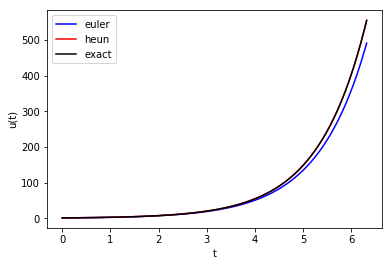

The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000031
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000015
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000008
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000004
The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=0.000002


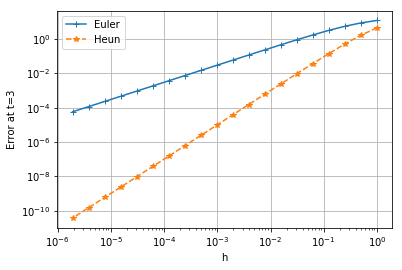

In [2]:
%pylab inline
import math

def euler(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + h*f(u,t)
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,h):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + h*f(u,t) # euler guess
        u = u + 0.5*h*(f(u,t) + f(ue,t+h))
        u_all.append(u)
        t = t + h
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

h = 0.04
u0 = 1.0
t0 = 0.0
tf = 2*pi

(u_all,t_all) = euler(f,u0,t0,tf,h)
pylab.plot(t_all, u_all,'b',label='euler')
(u_all,t_all) = heun(f,u0,t0,tf,h)
pylab.plot(t_all, u_all,'r',label='heun')

pylab.plot(t_all, numpy.exp(t_all),'k',label='exact')
pylab.xlabel('t');pylab.ylabel('u(t)');pylab.legend(loc='best')
show()


def approx_error(h, t_max):
    uall, tall =   euler(f,u0,t0,t_max,h)
    error_euler = abs(uall[-1]-exp(t_max))
    uall, tall =   heun(f,u0,t0,t_max,h)
    error_heun = abs(uall[-1]-exp(t_max))
    return error_euler, error_heun

erre = []
errh = []
h_array = []
h = 1
while h > 0.000001:
    h_array.append(h)
    err1, err2 = approx_error(h, 3)
    erre.append(err1)
    errh.append(err2)
    if abs(err1 - err2) < 0.001: 
        print("The difference of the errors with Euler forward and Heun's methods is smaller than 1e-3 for h=%f" % h)
    h  *= 0.5


pylab.loglog(h_array, erre, '+-', label = 'Euler')
pylab.loglog(h_array, errh, '*--', label = 'Heun')
xlabel('h');ylabel('Error at t=3');grid(True);pylab.legend(loc='best')
pylab.show()

## <span style="color:blue">Exercise: Study a function and its derivative [Langtangen B.3]</span>

Consider the function:
$$ u(x) = \sin\left(\frac{1}{x+\epsilon}\right)$$ 
for x ranging from 0 to 1, and the derivative
$$u'(x) = \frac{-\cos({\frac{1}{x+\epsilon}})}{(x+\epsilon)^2} $$
Here, $\epsilon$ is a given input parameter.


Make sure you can find the expression of $u'(x)$ by pen and paper.

Let us subdivide interval $[0,1]$ into n points $x_0=0, ..., x_{n-1}=1$.

Write a function *compute_discrete_u(epsilon, n)* that returns two numpy arrays:
  - *x_array* contains the coordinates of the $n$ points
  - *u_array* contains the discrete values of $u$ at these points.

Write a function *compute_derivatives(x_array, u_array)* that returns two numpy arrays:
  - *derivative_exact_array* contains the exact derivative given by $u' = u'(x)$  above
  - *derivative_fd_array* contains an approximate derivative obtained with a finite difference method. Use a central differencing method for inner points, and a forward (resp. backward) differencing for the first (resp. last) points.

Test the function using $n = 10$ and $\epsilon= 1/5$ and plot the two derivatives against x.

How large do you have to choose $n$ in order for the relative difference between
these two functions to be less than 0.1?  
For the difference, you can use the formula:
$$ D = \max_{i=0...n} \left|\frac{u'_{exact}(x_i)-u'_{approx}(x_i)}{u'_{exact}(x_i)}\right|$$

Let $\epsilon = 1/10$ and $1/20$, and repeat previous question.

Try to determine experimentally how large $n$ needs to be for a given
value of $\epsilon$ such that increasing n further does not change the plot
so much that you can view it on the screen. Note, that there
is no exact solution to this problem.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sin', 'f', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


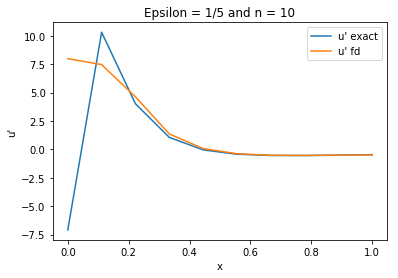

For epsilon = 1/5, the error becomes < 0.1 for n = 1280


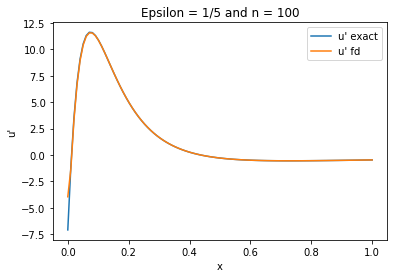

For epsilon = 1/5, the two curves begin to look similar for n = 100


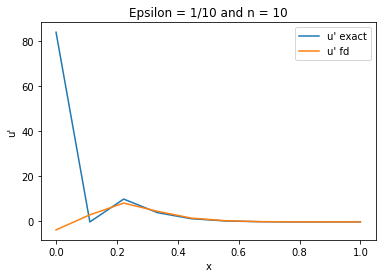

For epsilon = 1/10, the error becomes < 0.1 for n = 320


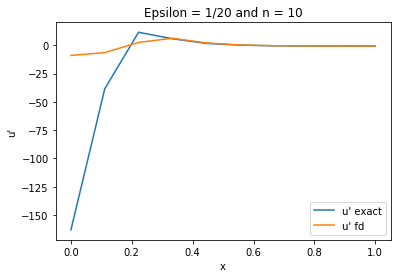

For epsilon = 1/20, the error becomes < 0.1 for n = 5120


In [3]:
from math import cos, sin
import numpy as np

%pylab inline

def u(epsilon, x):
    return sin(1/(x+epsilon))

def u_prime(epsilon, x):
    return -cos(1/(x+epsilon)) / ((x+epsilon)*(x+epsilon))

def relative_error(array1, array2):
    return max(abs((array1-array2)/array1))

def compute_discrete_u(epsilon, n):
    x_array = []
    u_array = []
    for i in range(n):
        x = i*1./(n-1)
        x_array.append(x)
        u_discrete = u(epsilon, x)
        u_array.append(u_discrete)
    return np.array(x_array), np.array(u_array)

def compute_derivatives(epsilon, x_array, u_array):
    derivative_exact_array = []
    derivative_fd_array = []
    for i in range(n):
        derivative_exact = u_prime(epsilon, x_array[i])
        derivative_exact_array.append(derivative_exact)
        if i == 0:
            derivative_fd = (u_array[i+1]-u_array[i])/(x_array[i+1]-x_array[i])
        elif i == n-1:
            derivative_fd = (u_array[i]-u_array[i-1])/(x_array[i]-x_array[i-1])
        else :
            derivative_fd = (u_array[i+1]-u_array[i-1])/(x_array[i+1]-x_array[i-1])
        derivative_fd_array.append(derivative_fd)
    return np.array(derivative_exact_array), np.array(derivative_fd_array)


#### Test 1
epsilon = 1./5
n = 10
x_array, u_array = compute_discrete_u(epsilon, n)
derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
pylab.figure(1)
pylab.plot(x_array, derivative_exact, label = 'u\' exact')
pylab.plot(x_array, derivative_fd, label = 'u\' fd')
pylab.xlabel('x'); pylab.ylabel('u\''); pylab.legend(loc='best')
pylab.title("Epsilon = 1/5 and n = %d" %n)
pylab.show()

n=5
error = 100
while error > 0.1 :
    n *= 2
    x_array, u_array = compute_discrete_u(epsilon, n)
    derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
    error = relative_error(derivative_exact, derivative_fd)
print("For epsilon = 1/5, the error becomes < 0.1 for n = %d" %n)


#### Test 1bis
epsilon = 1./5
n = 100
x_array, u_array = compute_discrete_u(epsilon, n)
derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
pylab.figure(2)
pylab.plot(x_array, derivative_exact, label = 'u\' exact')
pylab.plot(x_array, derivative_fd, label = 'u\' fd')
pylab.xlabel('x'); pylab.ylabel('u\''); pylab.legend(loc='best')
pylab.title("Epsilon = 1/5 and n = %d" %n)
pylab.show()
print("For epsilon = 1/5, the two curves begin to look similar for n = %d" %n)

#### Test 2
epsilon = 1./10
n = 10
x_array, u_array = compute_discrete_u(epsilon, n)
derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
pylab.figure(3)
pylab.plot(x_array, derivative_exact, label = 'u\' exact')
pylab.plot(x_array, derivative_fd, label = 'u\' fd')
pylab.xlabel('x'); pylab.ylabel('u\''); pylab.legend(loc='best')
pylab.title("Epsilon = 1/10 and n = %d" %n)
pylab.show()

n=5
error = 100
while error > 0.1 :
    n *= 2
    x_array, u_array = compute_discrete_u(epsilon, n)
    derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
    error = relative_error(derivative_exact, derivative_fd)
print("For epsilon = 1/10, the error becomes < 0.1 for n = %d" %n)


#### Test 3
epsilon = 1./20
n = 10
x_array, u_array = compute_discrete_u(epsilon, n)
derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
pylab.figure(4)
pylab.plot(x_array, derivative_exact, label = 'u\' exact')
pylab.plot(x_array, derivative_fd, label = 'u\' fd')
pylab.xlabel('x'); pylab.ylabel('u\''); pylab.legend(loc='best')
pylab.title("Epsilon = 1/20 and n = %d" %n)
pylab.show()

n=5
error = 100
while error > 0.1 :
    n *= 2
    x_array, u_array = compute_discrete_u(epsilon, n)
    derivative_exact, derivative_fd = compute_derivatives(epsilon, x_array, u_array)
    error = relative_error(derivative_exact, derivative_fd)
print("For epsilon = 1/20, the error becomes < 0.1 for n = %d" %n)

## <span style="color:blue">Exercise: Experimental data [Kiusalaas A.15]</span>

The relationship between the stress $\sigma$ and the strain $\epsilon$ of some biological materials in uniaxial tension is

$$
\frac{\mathrm{d}\sigma}{\mathrm{d}\epsilon} = a + b\sigma
$$

where a and b are constants. 

The following table gives experimental data for the stress and strain of such a material:  
<table>
<tr><td>Strain $\epsilon$  </td><td> Stress $\sigma$ (MPa) </td></tr> 
<tr><td>0      </td><td>    0      </td></tr>
<tr><td>0.05   </td><td>    0.252  </td></tr>
<tr><td>0.10   </td><td>    0.531  </td></tr>
<tr><td>0.15   </td><td>    0.840  </td></tr>
<tr><td>0.20   </td><td>    1.184  </td></tr>
<tr><td>0.25   </td><td>    1.558  </td></tr>
<tr><td>0.30   </td><td>    1.975  </td></tr>
<tr><td>0.35   </td><td>    2.444  </td></tr>
<tr><td>0.40   </td><td>    2.943  </td></tr>
<tr><td>0.45   </td><td>    3.500  </td></tr>
<tr><td>0.50   </td><td>    4.115  </td></tr>
</table>

Write a program that computes and plots the tangent modulus $\mathrm{d}\sigma/\mathrm{d}\epsilon$ versus $\sigma$.

Using [Lecture 1](http://nbviewer.jupyter.org/github/ggorman/Numerical-methods-1/blob/master/notebook/interpolation.ipynb) compute the parameters $a$ and $b$ by linear regression (*i.e.* fit a straight line, (a polynomial of degree ...) to the data).


Populating the interactive namespace from numpy and matplotlib


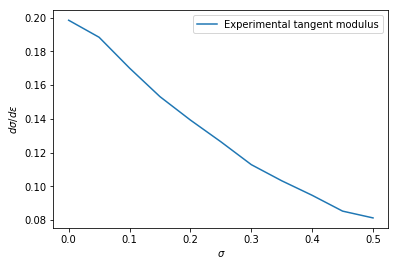

The coefficients are: a=-0.245409  and b=0.193455


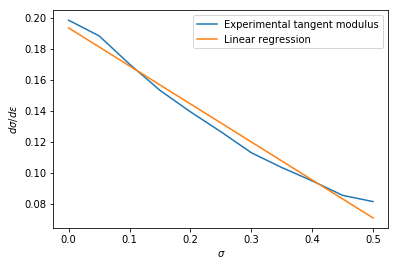

In [4]:
import numpy as np

%pylab inline

strain = np.array([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
stress = np.array([0, 0.252, 0.531, 0.840, 1.184, 1.558, 1.975, 2.444, 2.943, 3.500, 4.115])

n = strain.size

tangent_modulus = zeros(n)
for i in range(n):
    if i == 0:
        derivative_fd = (strain[i+1]-strain[i])/(stress[i+1]-stress[i])
    elif i == n-1:
        derivative_fd = (strain[i]-strain[i-1])/(stress[i]-stress[i-1])
    else :
        derivative_fd = (strain[i+1]-strain[i-1])/(stress[i+1]-stress[i-1])
    tangent_modulus[i] = derivative_fd
    
pylab.plot(strain, tangent_modulus, label = 'Experimental tangent modulus')
pylab.xlabel('$\sigma$'); pylab.ylabel('$d\sigma/d\epsilon$'); pylab.legend(loc='best')
pylab.show()

poly = np.polyfit(strain, tangent_modulus, deg=1)
a,b = poly
print("The coefficients are: a=%f  and b=%f" %(a,b))
straight_line = a*strain+b

pylab.plot(strain, tangent_modulus, label = 'Experimental tangent modulus')
pylab.plot(strain, straight_line, label = 'Linear regression')
pylab.xlabel('$\sigma$'); pylab.ylabel('$d\sigma/d\epsilon$'); pylab.legend(loc='best')
pylab.show()